In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import datetime

In [33]:
from scipy.integrate import quad
from scipy.special import j0, j1

def integrand(omega, U):
    return j0(omega) * j1(omega) / (omega * (1 + np.exp(2 * U * omega)))

# Define the integral as a function of U
def bethe_ground_state(U):
    parts = [(0, 1), (1, 10), (10, 100), (100, np.inf)]  # Define subranges
    result = 0
    for lower, upper in parts:
        res, _ = quad(lambda x: integrand(x, U), lower, upper)
        result += res
    return result * 4 * (-1)

# Test the function for a specific value of U
U = 1  # Example value for U
print(bethe_ground_state(U/4))


-1.0403686533944374


In [6]:
directory = '/home/gaurav/Projects/DMRG/output/clust_out/'


# Get details of all files in the specified directory
file_details = []
for f in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, f)):
        file_info = os.stat(os.path.join(directory, f))
        file_details.append({
            'name': f,
            'size': file_info.st_size,
            'modified': datetime.datetime.fromtimestamp(file_info.st_mtime)
        })
        print(f)

U_ladder_20240604-165454.pkl
U_ladder_20240605-183117.pkl
U_ladder_20240604-165352.pkl


In [15]:
file_path = directory + file_details[1]['name']

with open(file_path, 'rb') as file:
    data_dict = pickle.load(file)
    
GS_list = data_dict['GS_list'] 
L_list = data_dict['L_list'] 
n_rungs_list = data_dict['n_rungs_list'] 
U = data_dict['U'] 
U_start = data_dict['U_start']
t = data_dict['t'] 
mu = data_dict['mu'] 
chi_max = data_dict['chi_max'] 
sweeps = data_dict['sweeps']
duration = data_dict['duration']

/tmp/ipykernel_92914/122807654.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(lambda x: integrand(x, U), 0, np.inf)


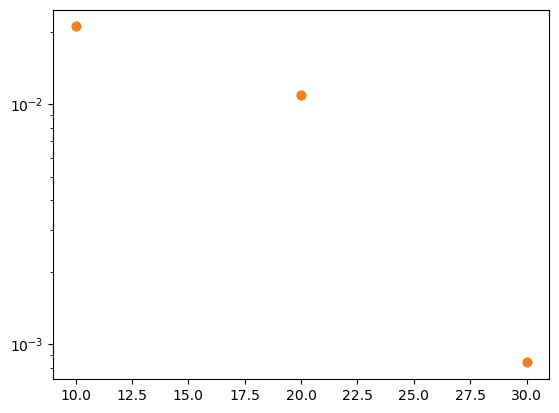

In [28]:
for i, L in enumerate(n_rungs_list):
    plt.scatter(L_list, np.abs(GS_list[i,:]-bethe_ground_state(U/4)))
    
plt.yscale('log')

In [23]:
GS_list[:,0]

array([-1.29441313, -1.29441332])

In [18]:
n_rungs_list

range(5, 15, 5)